In [1]:
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

import cartopy.crs as ccrs
import cartopy.feature

In [2]:
NDData=pd.read_pickle('IEData\\NaDeneDraws.pkl')

In [3]:
os.chdir(os.getcwd() + '\\SavedFigures\\')

In [4]:
for i in range(100):
    NDData[i].showtree()
    Fig = 'NDFig'+str(i)+'.png'
    plt.savefig(Fig, bbox_inches = 'tight')
    plt.close() 

Make a movie from the figures...

In [13]:
ffmpeg -f image2 -r 1/5 -i NDFig%d.png -vcodec mpeg4 -y movie.mp4

SyntaxError: invalid syntax (<ipython-input-13-e127e0f05749>, line 1)

In [12]:
os.system('ffmpeg -y -framerate 1/0.25 -i NDFig%d.png -c:v libx264 -r 30 NaDeneSim.mp4')

0

C:\Users\mjbaker\AppData\Local\Continuum\Anaconda3\lib\site-packages\cartopy\io\__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\mjbaker\AppData\Local\Continuum\Anaconda3\lib\site-packages\cartopy\io\__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\mjbaker\AppData\Local\Continuum\Anaconda3\lib\site-packages\cartopy\io\__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\mjbaker\AppData\Local\Continuum\Anaconda3\lib\site-packages\cartopy\io\__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_lakes.zip
  warnings.warn('Downloading: {}'.for

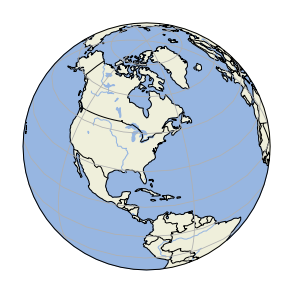

In [5]:
fig = plt.figure(figsize=[10, 5])
ax1 = plt.subplot(1, 1, 1, projection=ccrs.NearsidePerspective(central_longitude=-80.0, central_latitude=40.0, 
                satellite_height=35785831, false_easting=0, false_northing=0, globe=None))

ax1.add_feature(cartopy.feature.LAND)
ax1.add_feature(cartopy.feature.OCEAN)
ax1.add_feature(cartopy.feature.COASTLINE)
ax1.add_feature(cartopy.feature.LAKES)
ax1.add_feature(cartopy.feature.RIVERS)
ax1.add_feature(cartopy.feature.BORDERS)
ax1.gridlines()

plt.scatter(lngArr, latArr, s=area, c=satLngArr, alpha=0.5, transform=ccrs.Geodetic()) 

plt.show()

In [6]:
NaDeneEx = NDData[99]

NaDeneEx.RouteChooser()
NaDeneEx.TimeInPlace()

C:\Users\mjbaker\Documents\GitHub\InstEvo\PyInstEvo.py:1440: RuntimeWarning: divide by zero encountered in log
  lnD       = - np.log(D)
C:\Users\mjbaker\Documents\GitHub\InstEvo\PyInstEvo.py:1605: RuntimeWarning: divide by zero encountered in log
  toGet = np.matrix(-np.log(D))[origin,:][:,colns].T


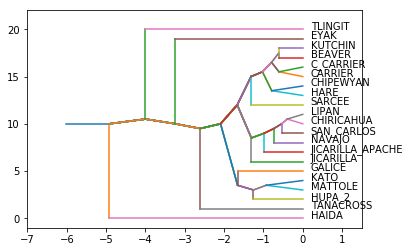

In [7]:
NaDeneEx.showtree()

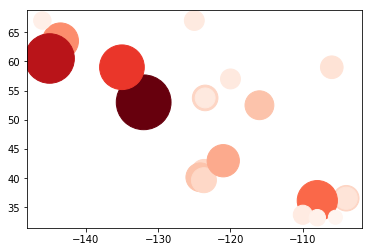

In [12]:
y = np.asarray(NaDeneEx.lat.astype(float)).flatten().tolist()
x = np.asarray(NaDeneEx.lon.astype(float)).flatten().tolist()
        
Order=np.asarray(NaDeneEx.resolvedtree[:,-1]).astype(int).flatten()

    # It might be better to reorder this elsewhere!
        
y = [y[i] for i in Order]
x = [x[i] for i in Order]
        
name = np.asarray(NaDeneEx.name).flatten().tolist()

s = [3000*n for n in NaDeneEx.timeinplace]

myfig = plt.figure()
mypic = myfig.add_subplot(111)
mypic.scatter(x, y, c=s, s=s, cmap='Reds')

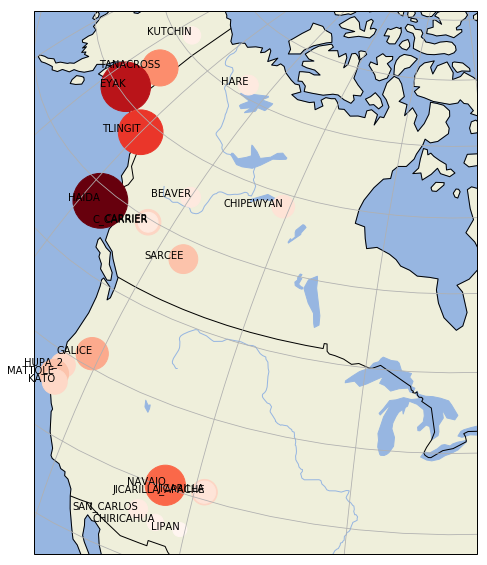

In [71]:
fig = plt.figure(figsize=[10, 10])

ax1 = plt.subplot(1, 1, 1, zorder=1,projection=ccrs.NearsidePerspective(central_longitude=-80.0, central_latitude=40.0, 
                satellite_height=35785831, false_easting=0, false_northing=0, globe=None))
plt.scatter(x, y, s=s, zorder=2,  c=s, cmap='Reds', transform=ccrs.Geodetic())
ax1.add_feature(cartopy.feature.LAND)
ax1.add_feature(cartopy.feature.OCEAN)
ax1.add_feature(cartopy.feature.COASTLINE)
ax1.add_feature(cartopy.feature.LAKES)
ax1.add_feature(cartopy.feature.RIVERS)
ax1.add_feature(cartopy.feature.BORDERS)
ax1.gridlines()

for xx, yy, nn in zip(x, y, name):
    plt.text(xx, yy,nn,horizontalalignment='right',
         transform=ccrs.Geodetic())


plt.scatter([-100, 50],[-30,50])
plt.show()